In [1]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def make_predict(path):  
#     feats = {}
#     for file in Path(path).glob("*.txt"):
#         feats = np.loadtxt(file)
#         if len(feats.shape) > 1:
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2,:])
#         else: 
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2])

In [3]:
# path = "./chem_data/processed_output_some/0001_simple_cond/"
# make_predict(path)

In [4]:
# !python -m chem_data.chemgns --action='predict' --raw_data_path="./chem_data/to_predict"  --preped_data_path="./gns/prepared_topredict/"

In [5]:
# !python -m gns.train --mode="predict" --data_path="./gns/prepared_topredict/" --model_path="./gns/model/" --output_path="./gns/predicted_rollout" --model_file="model-300.pt" --train_state_file="train_state-300.pt"

# Check Results

In [6]:
import chem_data.analyze_results as ar

In [7]:
rollout_results = "./chem_data/Scenario3-rep3/"

In [8]:
rollout_data = ar.load_rollout_data(rollout_results)

In [9]:
ro = rollout_data['rollout_ex00_dict.pkl']

In [10]:
import torch
# Save the data back to a new pickle file
with open('./chem_data/Scenario3-rep3/rollout_dict_cpu.pkl', 'wb') as f:
    torch.save(ro, f)

In [16]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [17]:
true_x.keys()

dict_keys(['H2O', 'SO4', 'H2SO4'])

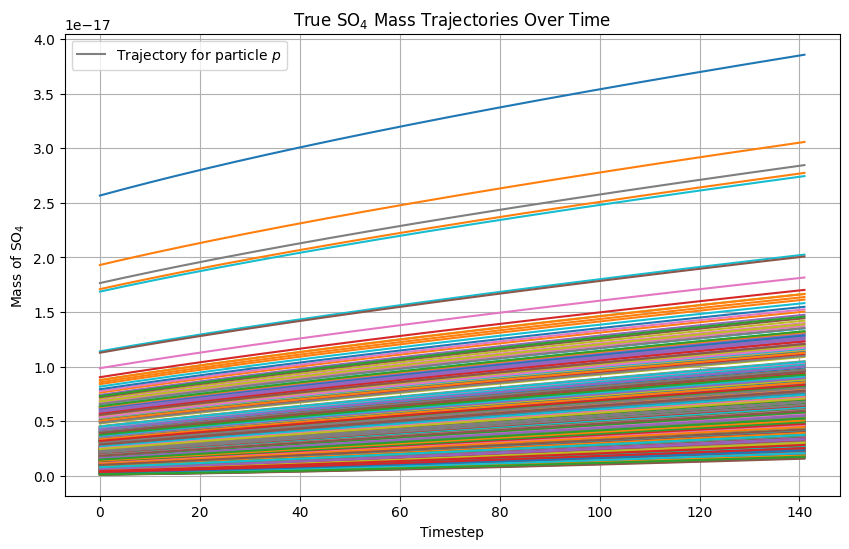

In [18]:
# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(true_x['SO4'])

# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Mass of SO$_4$')
plt.title('True SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
plt.plot([], [], color='gray', label='Trajectory for particle $p$')
plt.legend(loc='upper left', frameon=True)

# Show plot
plt.grid(True)
plt.savefig("trueso4rep3.png")

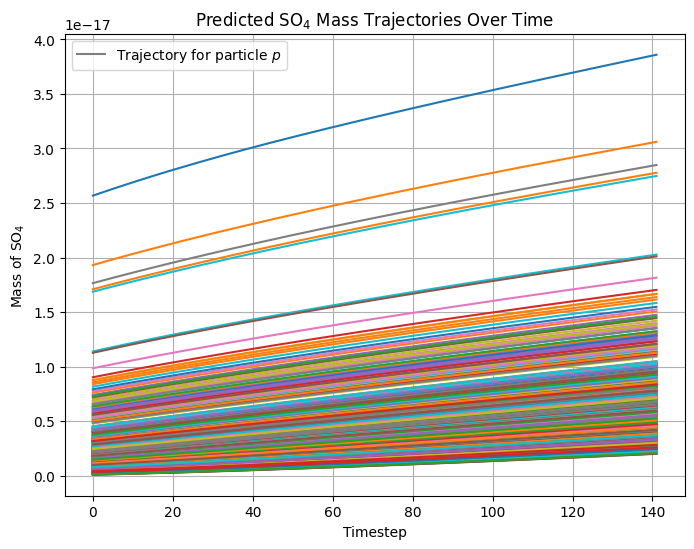

In [19]:
# Plot trajectories
plt.figure(figsize=(8, 6))
plt.plot(pred_x['SO4'])

# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Mass of SO$_4$')
#plt.xlim(0,144)
plt.title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
plt.plot([], [], color='gray', label='Trajectory for particle $p$')
plt.legend(loc='upper left', frameon=True)

# Show plot
plt.grid(True)
plt.savefig("predso4rep3.png")

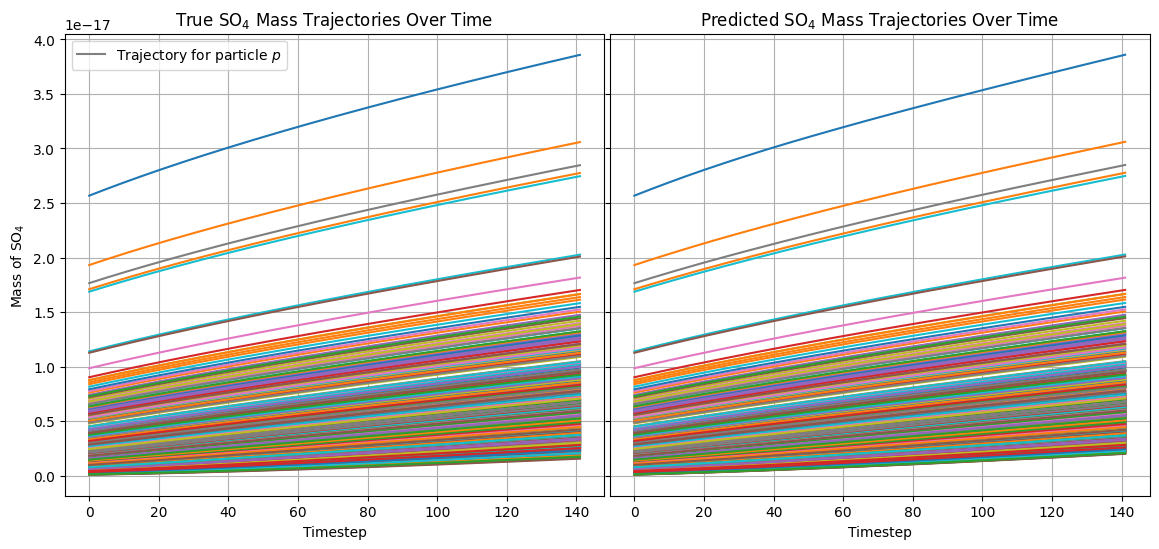

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO4'])
ax2.plot(pred_x['SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_4$')

ax1.set_title('True SO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("so4rep3.png")

In [21]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

0.013310411749100935

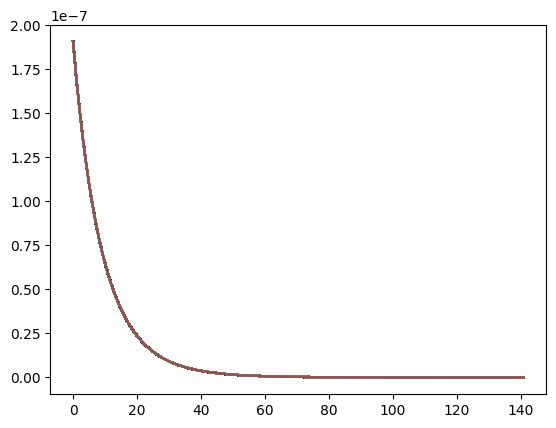

In [22]:
plt.plot(true_x['H2SO4'])
plt.show()

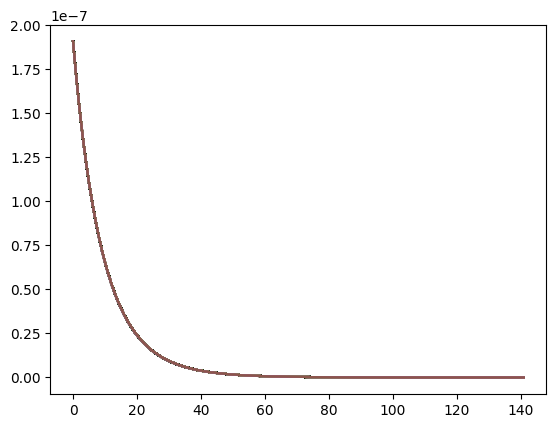

In [23]:
plt.plot(pred_x['H2SO4'])
plt.show()

In [24]:
pred_x['H2SO4'].shape

(142, 1146)

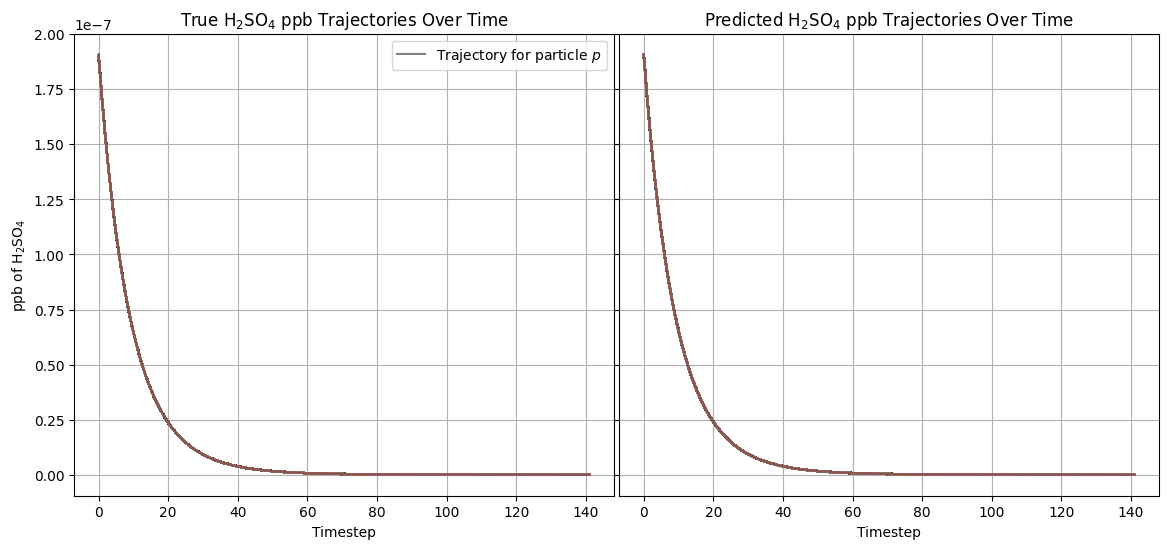

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4'])
ax2.plot(pred_x['H2SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('ppb of H$_2$SO$_4$')

ax1.set_title('True H$_2$SO$_4$ ppb Trajectories Over Time')
ax2.set_title('Predicted H$_2$SO$_4$ ppb Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper right', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2so4rep3.png")

In [26]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

0.02433435954769566

In [27]:
true_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': true_x['SO4']}

In [28]:
pred_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': pred_x['SO4']}

In [29]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [30]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

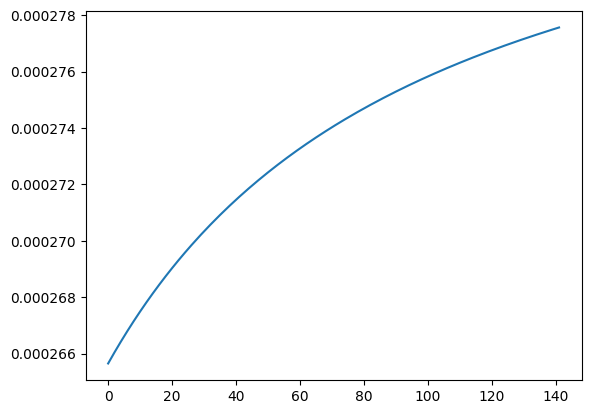

In [31]:
plt.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))

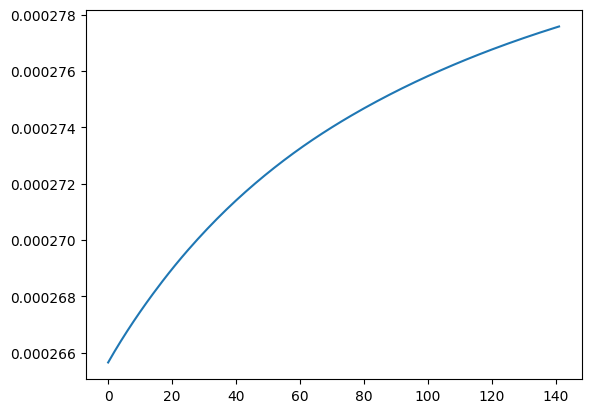

In [32]:
plt.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

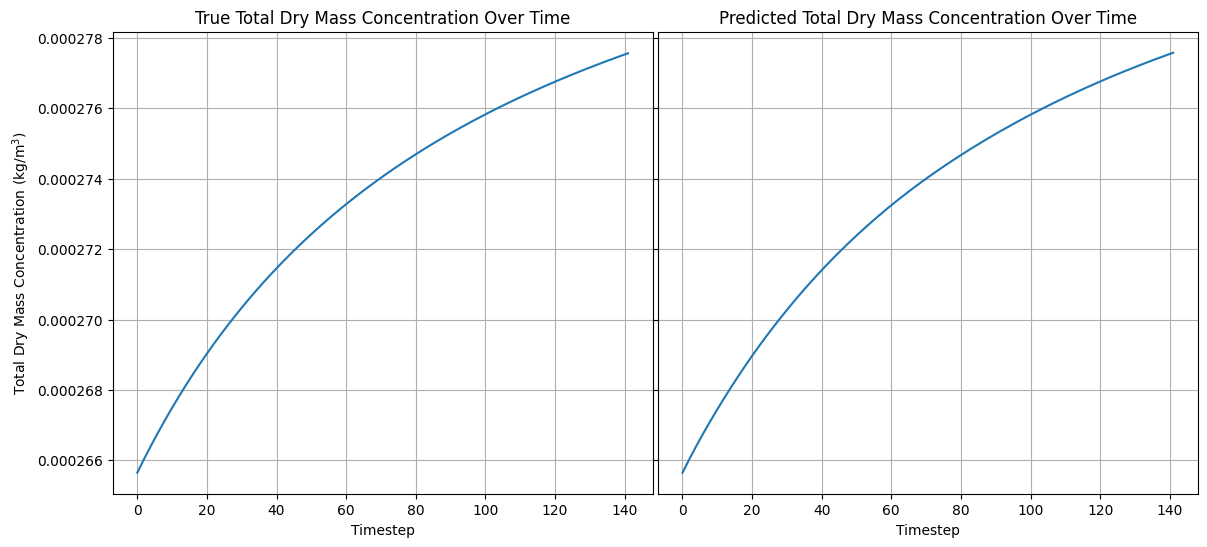

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))
ax2.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Total Dry Mass Concentration (kg/m$^3$)')

ax1.set_title('True Total Dry Mass Concentration Over Time')
ax2.set_title('Predicted Total Dry Mass Concentration Over Time')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("dm_conc_rep3.png")

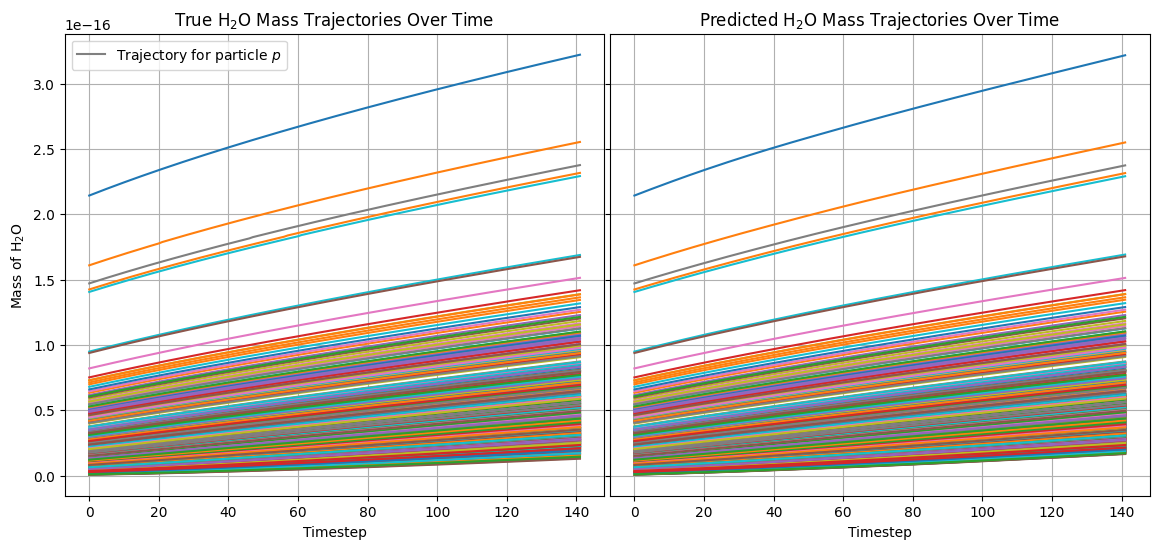

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2O'])
ax2.plot(pred_x['H2O'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H$_2$O')

ax1.set_title('True H$_2$O Mass Trajectories Over Time')
ax2.set_title('Predicted H$_2$O Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2orep3.png")

In [35]:
ar.nmae(true_x['H2O'], pred_x['H2O'])

0.013989811002797104

In [36]:
total_true_drymass = sum(true_dry_mass.values())

In [37]:
total_pred_drymass = sum(pred_dry_mass.values())

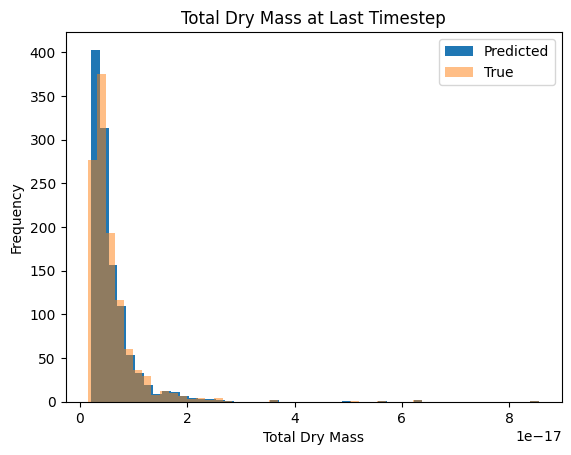

In [38]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50, label="Predicted")
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Total Dry Mass')
plt.ylabel('Frequency')
plt.title('Total Dry Mass at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dm_hist_rep4.png")

In [39]:
mat_prop['aero_number'].shape

(142, 1146)

In [40]:
dNdt = mat_prop['aero_number'][1:,:] - mat_prop['aero_number'][:-1,:]

In [41]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [42]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [43]:
true_dDdrydt = true_Ddry[1:,:] - true_Ddry[:-1,:]

In [44]:
pred_dDdrydt = pred_Ddry[1:,:] - pred_Ddry[:-1,:]

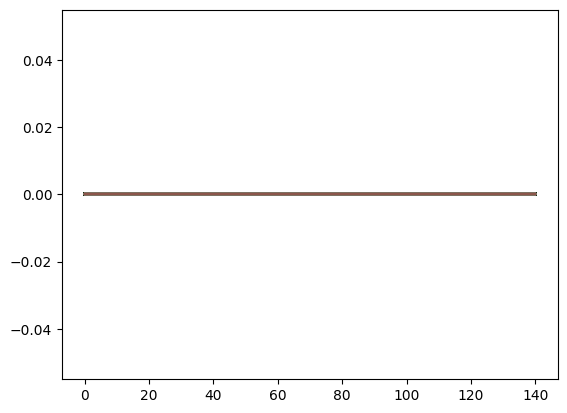

In [45]:
plt.plot(dNdt / pred_dDdrydt)
plt.show()

In [46]:
true_gmean, true_gstd = ar.mean_std_diameter(true_dry_mass)
pred_gmean, pred_gstd = ar.mean_std_diameter(pred_dry_mass)

In [47]:
diams = np.logspace(-9,-6, true_gmean.shape[0])

In [48]:
true_Ddry[-1,:].shape

(1146,)

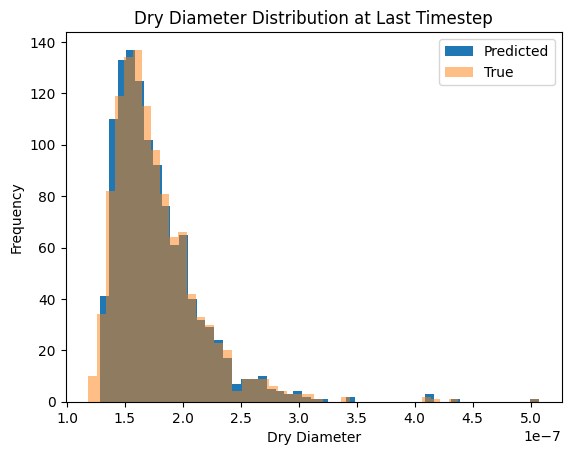

In [49]:
fig, ax = plt.subplots()
ax.hist(pred_Ddry[-1,:], bins=50, label="Predicted")
ax.hist(true_Ddry[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Dry Diameter')
plt.ylabel('Frequency')
plt.title('Dry Diameter Distribution at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dd_hist_rep3.png")

In [50]:
def lognormal_distro(number_conc, diams, gmeans, gstds):
    return ((number_conc / (np.sqrt(2*np.pi) * np.log10(gstds))) * 
            np.exp(-0.5 * ((np.log10(diams) - np.log10(gmeans))**2 / (2 * np.log10(gstds)**2))))

In [51]:
true_nD = lognormal_distro(mat_prop['aero_number'], true_Ddry, true_gmean, true_gstd)
pred_nD = lognormal_distro(mat_prop['aero_number'], pred_Ddry, pred_gmean, pred_gstd)

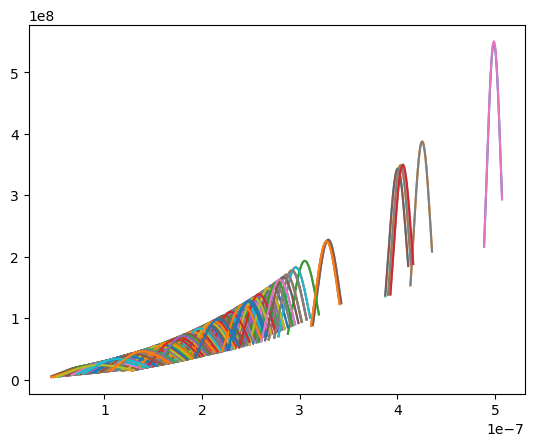

In [52]:
plt.plot(true_Ddry, true_nD)
plt.plot(pred_Ddry, pred_nD)
plt.show()

In [ ]:
# for i in range(0, true_drymass.shape[0], 10):
#     fig, ax = plt.subplots()
#     ax.hist(pred_drymass[i,:], bins=100)
#     ax.hist(true_drymass[i,:], bins=100, alpha=0.5)
#     plt.savefig(f"./figures/hists/hist{i}.png")
#     plt.close()